# Experimental Planning Applied to Energetic Process - ENE108

Dr. Fernando Gasi; Dra. Graziella Colato Antonio; Dra. Juliana Tófano de Campos Leite Toneli


# Article Selected


The economical feasibility of ethanol production using lignocellulosic biomass is primarilly dependent on the cost of the required enzymes, e.g. celullase. By this reason there is and increasing interest in optimizing the process of obtaining this enzymes. In the article [Nitrogen Source Optimization for Cellulase Production
by Penicillium funiculosum, using a Sequential
Experimental Design Methodology and the Desirability
Function](https://link.springer.com/content/pdf/10.1007/s12010-009-8875-6.pdf?pdf=button), the authors used three sucessice designs of experiments to optimize celullase production. The incremental methodology consists of sucessively cut off irrelevant terms in models obtained by a $2^4$ and $2^3$ factorial designs and finally perform ANOVA in a central composite rotational design. 

# Variables and Levels

# Responses

# Matrices of experiments

# ANOVA

# Hypotesis

The main hypotesis is that a sequential methodology for experimental design can be efficiently used to optmizethe the production of celullase by *Penicillinum funiculosum*. 

# Cellulalse Production Process

For optimization of cellulase production, the independent variables considered were 4 different sources of nitrogen:

- Urea (`U`)
- Ammonium Sulfate (`A`)
- Peptone (`P`)
- Yeast Extract (`Y`)

# $2^4$ Factorial Experiment

In the first experiment all independent variables was considered relevant on a factorial design with two levels and three central points. The data generated in the experiments are collected in the table below

In [1]:
from explann.dataio import ImportString

table_24 = ImportString(data="""
U;A;P;Y;F;CM;B
-1;-1;-1;-1;39;1.328;170
1;-1;-1;-1;87;1.699;122
-1;1;-1;-1;48;1.332;473
1;1;-1;-1;71;1.979;511
-1;-1;1;-1;43;1.458;156
1;-1;1;-1;84;2.189;204
-1;1;1;-1;45;1.343;385
1;1;1;-1;112;1.707;288
-1;-1;-1;1;19;1.257;114
1;-1;-1;1;146;2.148;116
-1;1;-1;1;50;1.592;244
1;1;-1;1;92;1.726;126
-1;-1;1;1;107;1.203;72
1;-1;1;1;172;2.261;210
-1;1;1;1;62;1.434;234
1;1;1;1;82;1.848;154
0;0;0;0;75;1.726;223
0;0;0;0;70;1.782;219
0;0;0;0;89;1.753;226
""", delimiter=";")

table_24.data

,U,A,P,Y,F,CM,B
0,-1,-1,-1,-1,39,1.328,170
1,1,-1,-1,-1,87,1.699,122
2,-1,1,-1,-1,48,1.332,473
3,1,1,-1,-1,71,1.979,511
4,-1,-1,1,-1,43,1.458,156
5,1,-1,1,-1,84,2.189,204
6,-1,1,1,-1,45,1.343,385
7,1,1,1,-1,112,1.707,288
8,-1,-1,-1,1,19,1.257,114
9,1,-1,-1,1,146,2.148,116


To build a full factorial desing with all interactions we just use the syntax ```U*A*P*Y``` for all the three response variables

In [2]:

from explann.models import FactorialModel

fm_24 = FactorialModel(
    data=table_24.data, 
    functions=
    {
        "F" : "F ~ U * A * P * Y",
        "CM" : "CM ~ U * A * P * Y",
        "B" : "B ~ U * A * P * Y"
    })

The ```summary()``` method shows up the coefficients and p-values of variables.



In [3]:
fm_24.summary()

/home/ppiper/micromamba/envs/explann/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/ppiper/micromamba/envs/explann/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/ppiper/micromamba/envs/explann/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


{'F': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      F   R-squared:                       0.992
 Model:                            OLS   Adj. R-squared:                  0.954
 Method:                 Least Squares   F-statistic:                     25.70
 Date:                Wed, 26 Jul 2023   Prob (F-statistic):             0.0107
 Time:                        20:08:55   Log-Likelihood:                -49.091
 No. Observations:                  19   AIC:                             130.2
 Df Residuals:                       3   BIC:                             145.3
 Df Model:                          15                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ----------------------------------------------------------------

W can use a significance value of 0.05 to retain only relavant termos for each model.

In [4]:
fm_24.get_significant_model_functions()

{'F': 'F ~ 1 + U + A + U:A + P + Y + A:Y + U:A:Y + U:P:Y + A:P:Y',
 'CM': 'CM ~ 1 + U + U:A + U:A:Y',
 'B': 'B ~ 1 + U + A + U:A + P + U:P + A:P + U:A:P + Y + A:Y + U:A:Y + P:Y + U:P:Y + A:P:Y + U:A:P:Y'}

In [5]:
sig_fm_24 = fm_24.build_significant_models()
sig_fm_24.summary()

/home/ppiper/micromamba/envs/explann/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/ppiper/micromamba/envs/explann/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/ppiper/micromamba/envs/explann/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


{'F': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      F   R-squared:                       0.924
 Model:                            OLS   Adj. R-squared:                  0.847
 Method:                 Least Squares   F-statistic:                     12.08
 Date:                Wed, 26 Jul 2023   Prob (F-statistic):           0.000499
 Time:                        20:08:55   Log-Likelihood:                -70.868
 No. Observations:                  19   AIC:                             161.7
 Df Residuals:                       9   BIC:                             171.2
 Df Model:                           9                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ----------------------------------------------------------------

In [6]:
fm_24.lack_of_fit('F')

,Source_of_Variation,df,sum_sq,mean_sq,F,F_table,p
0,Regression,15.0,25083.437500,1672.229167,25.701023,8.702870,0.010672
1,Residual,3.0,195.194079,65.064693,NaN,NaN,NaN
2,Lack_of_Fit,1.0,1.194079,1.194079,0.012310,18.512821,0.921786
3,Pure_Error,2.0,194.000000,97.000000,NaN,NaN,NaN
4,Total,18.0,25278.631579,NaN,NaN,NaN,NaN


In [7]:
fm_24.lack_of_fit('CM')

,Source_of_Variation,df,sum_sq,mean_sq,F,F_table,p
0,Regression,15.0,1.810240,0.120683,14.242349,8.702870,0.025026
1,Residual,3.0,0.025421,0.008474,NaN,NaN,NaN
2,Lack_of_Fit,1.0,0.023852,0.023852,30.410361,18.512821,0.031346
3,Pure_Error,2.0,0.001569,0.000784,NaN,NaN,NaN
4,Total,18.0,1.835661,NaN,NaN,NaN,NaN


In [8]:
sig_fm_24.lack_of_fit('F', baseline=fm_24)



,Source_of_Variation,df,sum_sq,mean_sq,F,F_table,p
0,Regression,9.0,23346.562500,2594.062500,12.083710,3.178893,0.000499
1,Residual,9.0,1932.069079,214.674342,NaN,NaN,NaN
2,Lack_of_Fit,6.0,1736.875000,289.479167,4.449098,8.940645,0.124072
3,Pure_Error,3.0,195.194079,65.064693,NaN,NaN,NaN
4,Total,18.0,25278.631579,NaN,NaN,NaN,NaN


In [9]:
fm_24['F'].params.abs()

Intercept    78.578947
U            27.062500
A             8.437500
U:A           8.062500
P             9.687500
U:P           2.937500
A:P           4.687500
U:A:P         5.687500
Y            12.562500
U:Y           4.687500
A:Y          11.312500
U:A:Y         8.187500
P:Y           4.812500
U:P:Y         7.562500
A:P:Y         9.312500
U:A:P:Y       0.687500
dtype: float64

In [10]:
fm_24['F'].params.abs().sort_values(ascending=False)

Intercept    78.578947
U            27.062500
Y            12.562500
A:Y          11.312500
P             9.687500
A:P:Y         9.312500
A             8.437500
U:A:Y         8.187500
U:A           8.062500
U:P:Y         7.562500
U:A:P         5.687500
P:Y           4.812500
U:Y           4.687500
A:P           4.687500
U:P           2.937500
U:A:P:Y       0.687500
dtype: float64

In [11]:
keys_sorted = fm_24['F'].params.abs().sort_values(ascending=False).keys()

fm_24['F'].params[keys_sorted]

Intercept    78.578947
U            27.062500
Y            12.562500
A:Y         -11.312500
P             9.687500
A:P:Y        -9.312500
A            -8.437500
U:A:Y        -8.187500
U:A          -8.062500
U:P:Y        -7.562500
U:A:P         5.687500
P:Y           4.812500
U:Y           4.687500
A:P          -4.687500
U:P          -2.937500
U:A:P:Y      -0.687500
dtype: float64

{'F': <Axes: title={'center': 'F'}>,
 'CM': <Axes: title={'center': 'CM'}>,
 'B': <Axes: title={'center': 'B'}>}

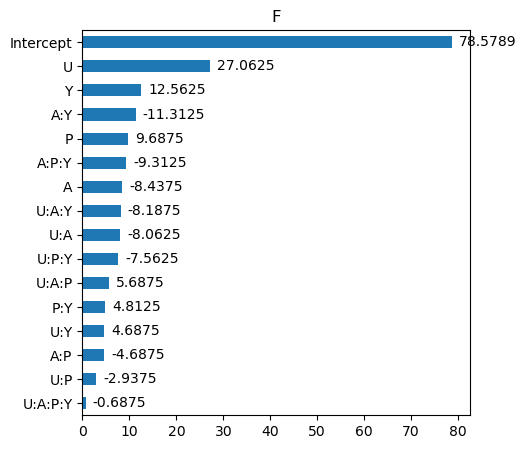

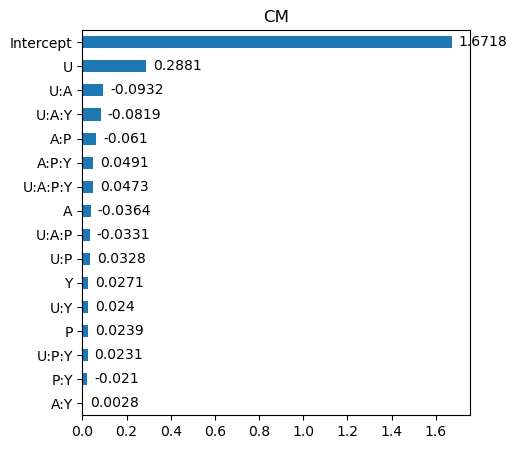

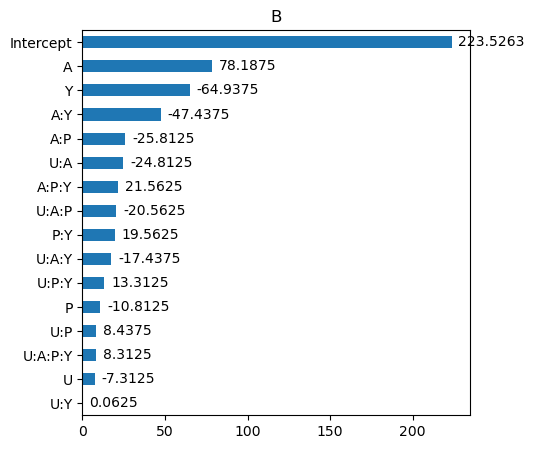

In [12]:
from explann.plot import ParetoPlot

pp = ParetoPlot(fm_24)
pp.plot(figsize=(5, 5))

# Central Composite Rotational Design

In [13]:
ccrm_table = ImportString(data="""
U	Y	F	CM	B
-1	-1	158	4029	727
-1	1	171	4354	1119
1	-1	166	5302	1080
1	1	244	5513	1101
-1.41	0	148	4481	743
1.41	0	263	6529	1213
0	-1.41	208	5460	1085
0	1.41	255	7105	1435
0	0	250	5364	1390
0	0	269	5524	1499
0	0	261	5793	1420
""", delimiter='\t')
ccrm_table.data

,U,Y,F,CM,B
0,-1.00,-1.00,158,4029,727
1,-1.00,1.00,171,4354,1119
2,1.00,-1.00,166,5302,1080
3,1.00,1.00,244,5513,1101
4,-1.41,0.00,148,4481,743
5,1.41,0.00,263,6529,1213
6,0.00,-1.41,208,5460,1085
7,0.00,1.41,255,7105,1435
8,0.00,0.00,250,5364,1390
9,0.00,0.00,269,5524,1499


In [14]:
ccrm_levels = ImportString(data="""
	-1.41	-1	0	1	1.41
U	0.07	0.4	1.2	2	2.33
Y	0	0.09	0.29	0.5	0.59
""", delimiter='\s+')
ccrm_levels.data.T

,U,Y
-1.41,0.07,0.00
-1,0.40,0.09
0,1.20,0.29
1,2.00,0.50
1.41,2.33,0.59


In [15]:
ccrm_levels.data.T.index

Index(['-1.41', '-1', '0', '1', '1.41'], dtype='object')

In [16]:
ccrm_table.data['U']

0    -1.00
1    -1.00
2     1.00
3     1.00
4    -1.41
5     1.41
6     0.00
7     0.00
8     0.00
9     0.00
10    0.00
Name: U, dtype: float64

In [31]:
val = 0.00
if val: 
    print(f"{val}".rstrip('.0')) 
else: 
    print(f"{0}")



0


In [17]:
ccrm_table.parse_levels(data=ccrm_levels.data.T)

KeyError: ''

In [ ]:
to_int = lambda x: int(x) if not x%1 else x

def substitute_leveles(table, levels, columns=['U', 'Y']):
    for column in columns:
        for i,val in enumerate(table[column]):
            table[column][i] = levels[column][f"{to_int(val)}"]
    return table

#ccrm_table = substitute_leveles(ccrm_table, ccrm_levels, columns=['U', 'Y'])

In [ ]:
ccrm_table

In [ ]:
import seaborn as sns

#sns.paretoplot(ccrm_table, x='FPase', y='CMCase')

In [ ]:
U = ccrm_table.U
Y = ccrm_table.Y
FPase = ccrm_table.FPase
CMCase = ccrm_table.CMCase
Bglucosidase = ccrm_table.Bglucosidase


AttributeError: 'ImportString' object has no attribute 'U'

In [ ]:
formula = "FPase ~ 1 + np.power(U,2) + np.power(Y,2) + U + Y"
#formula = "FPase ~ 1 + U*Y"
lm = ols(formula, ccrm_table).fit(cov_type='HC1')
print(lm.summary())

In [ ]:
lm.predict(ccrm_table[['U','Y']])

In [ ]:
anova_lm(lm, type=3)

In [ ]:
import matplotlib.pyplot as plt

u, y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(u, y, lm.predict(pd.DataFrame({'U':u.ravel(), 'Y':y.ravel()})).values.reshape(u.shape), cmap='viridis', edgecolor='none')

In [ ]:
print(anova_lm(lm))
print(anova_lm(lm, typ=2))
print(anova_lm(lm, typ=3))

In [ ]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(
    x=U.drop([4,5,6,7]),
    trace=Y.drop([4,5,6,7]),
    response=FPase.drop([4,5,6,7]),
    #colors=["red", "blue"],
    #markers=["D", "^"],
    #ms=10,
    ax=ax,
)


In [ ]:
# base code
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type
import statsmodels

style_talk = 'seaborn-talk'    #refer to plt.style.available

class LinearRegDiagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Authors:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.

        Matt Spinelli (m3spinelli@gmail.com, where 3 = r)
        (1) Fixed incorrect annotation of the top most extreme residuals in
            the Residuals vs Fitted and, especially, the Normal Q-Q plots.
        (2) Changed Residuals vs Leverage plot to match closer the y-axis
            range shown in the equivalent plot in the R package ggfortify.
        (3) Added horizontal line at y=0 in Residuals vs Leverage plot to
            match the plots in R package ggfortify and base R.
        (4) Added option for placing a vertical guideline on the Residuals
            vs Leverage plot using the rule of thumb of h = 2p/n to denote
            high leverage (high_leverage_threshold=True).
        (5) Added two more ways to compute the Cook's Distance (D) threshold:
            * 'baseR': D > 1 and D > 0.5 (default)
            * 'convention': D > 4/n
            * 'dof': D > 4 / (n - k - 1)
        (6) Fixed class name to conform to Pascal casing convention
        (7) Fixed Residuals vs Leverage legend to work with loc='best'
    """

    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)
        self.nresids = len(self.residual_norm)

    def __call__(self, plot_context='seaborn-paper', **kwargs):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(
                ax=ax[1,1],
                high_leverage_threshold = kwargs.get('high_leverage_threshold'),
                cooks_threshold = kwargs.get('cooks_threshold'))
            plt.show()

        return self.vif_table(), fig, ax,

    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.argsort(residual_abs), 0)
        abs_resid_top_3 = abs_resid[:3]
        for i in abs_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        fig = QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for i, x, y in self.__qq_top_resid(QQ.theoretical_quantiles, abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(x, y),
                ha='right',
                color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')

        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None, high_leverage_threshold=False, cooks_threshold='baseR'):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        factors = []
        if cooks_threshold == 'baseR' or cooks_threshold is None:
            factors = [1, 0.5]
        elif cooks_threshold == 'convention':
            factors = [4/self.nresids]
        elif cooks_threshold == 'dof':
            factors = [4/ (self.nresids - self.nparams)]
        else:
            raise ValueError("threshold_method must be one of the following: 'convention', 'dof', or 'baseR' (default)")
        for i, factor in enumerate(factors):
            label = "Cook's distance" if i == 0 else None
            xtemp, ytemp = self.__cooks_dist_line(factor)
            ax.plot(xtemp, ytemp, label=label, lw=1.25, ls='--', color='red')
            ax.plot(xtemp, np.negative(ytemp), lw=1.25, ls='--', color='red')

        if high_leverage_threshold:
            high_leverage = 2 * self.nparams / self.nresids
            if max(self.leverage) > high_leverage:
                ax.axvline(high_leverage, label='High leverage', ls='-.', color='purple', lw=1)

        ax.axhline(0, ls='dotted', color='black', lw=1.25)
        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_ylim(min(self.residual_norm)-0.1, max(self.residual_norm)+0.1)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        plt.legend(loc='best')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        return (vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y


    def __qq_top_resid(self, quantiles, top_residual_indices):
        """
        Helper generator function yielding the index and coordinates
        """
        offset = 0
        quant_index = 0
        previous_is_negative = None
        for resid_index in top_residual_indices:
            y = self.residual_norm[resid_index]
            is_negative = y < 0
            if previous_is_negative == None or previous_is_negative == is_negative:
                offset += 1
            else:
                quant_index -= offset
            x = quantiles[quant_index] if is_negative else np.flip(quantiles, 0)[quant_index]
            quant_index += 1
            previous_is_negative = is_negative
            yield resid_index, x, y


In [ ]:
cls = LinearRegDiagnostic(lm)

In [ ]:
cls.scale_location_plot()

In [ ]:
cls.leverage_plot()

In [ ]:
cls.leverage_plot(high_leverage_threshold=True, cooks_threshold='dof')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=2, include_bias=True, interaction_only=True)
X = poly.fit_transform(ccrm_table[['U','Y']])
y = ccrm_table['FPase']
poly.fit(X, y)

lin = LinearRegression(fit_intercept=False)
lin.fit(X, y)

In [ ]:
cls = LinearRegDiagnostic(lm)
vif, fig, ax = cls()
print(vif)

In [ ]:
import statsmodels.api as sm
fig = sm.graphics.influence_plot(lm, criterion="cooks")
fig.tight_layout(pad=1.0)

In [ ]:
fig = sm.graphics.plot_partregress_grid(lm)
fig.tight_layout(pad=1.0)

In [ ]:
fig = sm.graphics.plot_regress_exog(lm, "U")
fig.tight_layout(pad=1.0)

In [ ]:
fig = sm.graphics.plot_fit(lm, "U")
fig.tight_layout(pad=1.0)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
md = smf.mixedlm(formula, ccrm_table, groups=ccrm_table['U']
)
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

In [ ]:
lin.coef_

In [ ]:
import sys
sys.path.append('/home/ppiper/Dropbox/local/github/explann')

from explann.dataio import ImportData
from explann.models import FactorialModel

example_data = ImportData(
"""
Fe loss
1 0.01 127.6
2 0.48 124.0
3 0.71 110.8
4 0.95 103.9
5 1.19 101.5
6 0.01 130.1
7 0.48 122.0
8 1.44 92.3
9 0.71 113.1
10 1.96 83.7
11 0.01 128.0
12 1.44 91.4
13 1.96 86.2
"""
, delimiter=' ', index_col=0)

example_data.data

In [ ]:
example_model  = FactorialModel(
    data=example_data.data, 
    functions=
    {
        "loss" : "loss ~ Fe",
    })

In [ ]:
example_model.lack_of_fit()